In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd
import scipy.signal as sg
from IPython.display import Audio, display

import numpy as np


import sklearn
import librosa
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

In [2]:
# from io import BytesIO
# import tempfile
# import requests
# import pydub


In [3]:
def recorder(outfile):
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write(outfile, fs, myrecording)  # Save as WAV file     

In [4]:
ipd.Audio('Voices/levioza-origin.wav')

In [5]:
x_pos , sr_pos = librosa.load('Voices/positive.wav')
x_neg , sr_neg = librosa.load('Voices/negative.wav')
x_anc , sr_anc = librosa.load('Voices/levioza-origin.wav')

In [6]:
type(sr_pos)

int

In [7]:
def waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    librosa.display.waveplot(x, sr=sr)

In [8]:
def specto_plot(x, sr, y_axis='hz'):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis=y_axis)
    plt.colorbar()

In [9]:
def to_mfcc(x, sr):
    return librosa.feature.mfcc(x, sr=sr)

/home/nikalosa/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/nikalosa/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/nikalosa/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


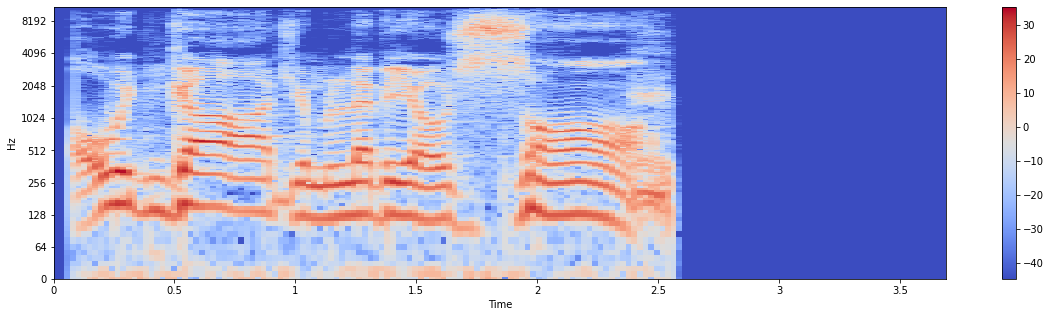

In [10]:
specto_plot(x_anc, sr_anc, 'log')

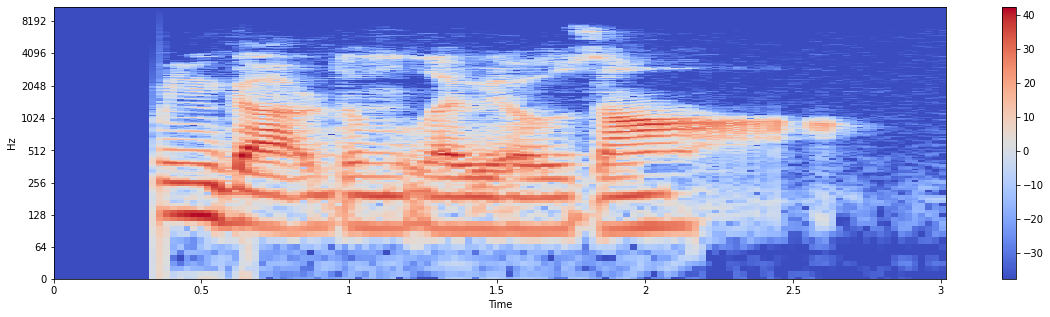

In [11]:
specto_plot(x_pos, sr_pos, 'log')

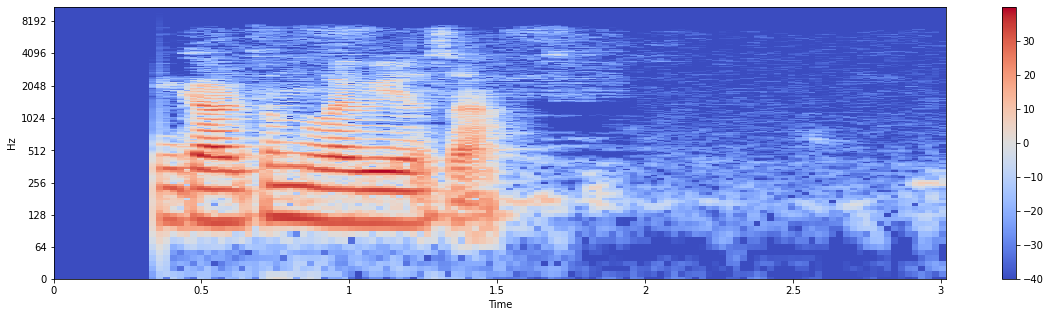

In [12]:
specto_plot(x_neg, sr_neg, 'log')

In [13]:
mfcc_anc = to_mfcc(x_anc, sr_anc)
mfcc_pos = to_mfcc(x_pos, sr_pos)
mfcc_neg = to_mfcc(x_neg, sr_neg)

In [14]:
xsim_pos = librosa.segment.cross_similarity(mfcc_anc, mfcc_pos, metric='cosine')
xsim_neg = librosa.segment.cross_similarity(mfcc_anc, mfcc_neg, metric='cosine')

In [15]:
print(xsim_pos)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ... False False False]
 [ True  True  True ...  True  True  True]]


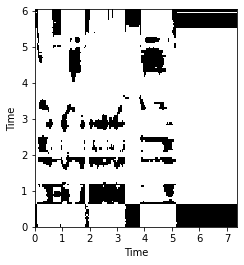

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(xsim_pos, x_axis='time', y_axis='time', hop_length=1024)

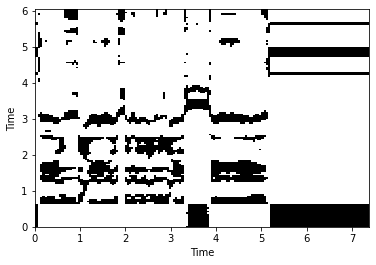

In [17]:
librosa.display.specshow(xsim_neg, x_axis='time', y_axis='time', hop_length=1024)

#### Filtering voice

In [18]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [19]:
play(x_anc, sr_anc)

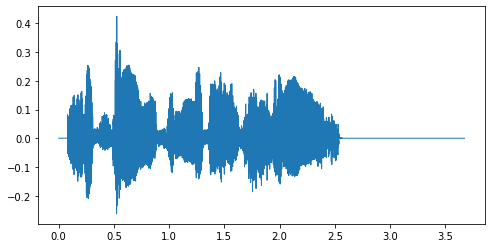

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x_anc) / sr_anc, len(x_anc))
ax.plot(t, x_anc, lw=1)

In [21]:
def filter(x, sr, low, high):
    b, a = sg.butter(4, Wn=[2*low/sr, 2*high/sr], btype='band')
    x_fil = sg.filtfilt(b, a, x)
    play(x_fil, sr)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(t, x, lw=1)
    ax.plot(t, x_fil, lw=1)
    return x_fil, sr

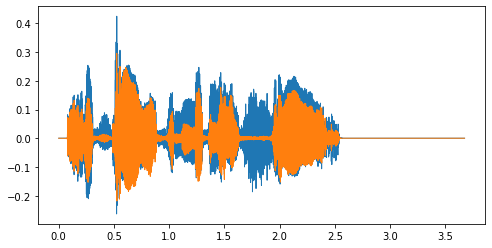

In [22]:
x_fil_anch, sr_anc = filter(x_anc, sr_anc, 300, 2000)

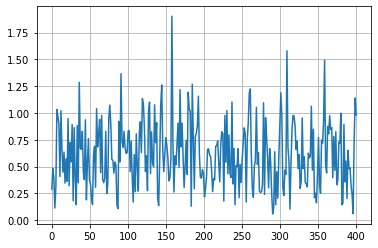

In [24]:
from scipy.fft import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
y = np.sin(50.0 * 2.0*np.pi*x_pos) + 0.5*np.sin(80.0 * 2.0*np.pi*x_pos)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [27]:
int(np.min(2./N * yf[0:N//2])

<ipython-input-27-532bbbdbc3ff>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  int(np.min(2./N * yf[0:N//2]))


-1

In [1]:
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

fpath = Path("path_to_an_audio_file")
wav = preprocess_wav(fpath)

encoder = VoiceEncoder()
embed = encoder.embed_utterance(wav)
np.set_printoptions(precision=3, suppress=True)
print(embed)

/home/nikalosa/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_an_audio_file'